In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjob as mr
import nltk

### Homework 5

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. Extension of homework to to implement an TD-IDF algorithm  (see below)

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

## Homework 5.1
A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [10]:
rawfile = open('C:\\Users\\Pavani\\Downloads\\big-data-python-class-master\\big-data-python-class-master\\Homeworks\\Homework5\\data\\bible+shakes.nopunc.txt')
rawdata = rawfile.read()
words = nltk.word_tokenize(rawdata)#tokenizes text in to list of words.
bigram =nltk.ngrams(words,2)#Generates bigrams
bigram_count = nltk.FreqDist(bigram)#computes the count of all bigrams
#Sorts and gives top 10 bigrams based on the bigram_count ([:10]) 
d=sorted(bigram_count.items(),key=lambda t:t[-1], reverse =True)[:10]
for k,v in d:
    print k,':',v

('of', 'the') : 13082
('the', 'lord') : 7141
('and', 'the') : 7071
('in', 'the') : 6782
('to', 'the') : 3822
('i', 'will') : 3518
('and', 'he') : 3040
('shall', 'be') : 3016
('all', 'the') : 2733
('i', 'have') : 2716


## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [12]:
rawfile = open('C:\\Users\\Pavani\\Downloads\\big-data-python-class-master\\big-data-python-class-master\\Homeworks\\Homework5\\data\\bible+shakes.nopunc.txt')
rawdata = rawfile.read()
bigram = [tuple(sorted(n)) for n in list(nltk.ngrams(rawdata.split(),2))]#Generates the bigram without any order
bigram_count=nltk.FreqDist(bigram)
d=sorted(bigram_count.items(), key=lambda t:t[-1], reverse=True)[:10]#sorts entire elements based on the bigram_count in reverse order
for k,v in d:
    print k,":",v    

('of', 'the') : 13082
('lord', 'the') : 7291
('and', 'the') : 7071
('in', 'the') : 6783
('i', 'will') : 4153
('the', 'to') : 3822
('have', 'i') : 3177
('and', 'he') : 3142
('be', 'shall') : 3018
('am', 'i') : 2911


## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [14]:
rawfile = open('C:\\Users\\Pavani\\Downloads\\big-data-python-class-master\\big-data-python-class-master\\Homeworks\\Homework5\\data\\bible+shakes.nopunc.txt')
rawdata = rawfile.read()
word = nltk.word_tokenize(rawdata)
trigrams = [tuple(sorted(n)) for n in list(nltk.ngrams(rawdata.split(),3))]#creates trigrams without any order
trigram_count=nltk.FreqDist(trigrams)
d=sorted(trigram_count.items(), key=lambda t:t[-1], reverse=True)[:10]
for k,v in d:
    print k,":",v    

('lord', 'of', 'the') : 2054
('children', 'of', 'the') : 1794
('house', 'of', 'the') : 1583
('of', 'son', 'the') : 1527
('and', 'lord', 'the') : 1429
('land', 'of', 'the') : 1025
('lord', 'saith', 'the') : 866
('of', 'out', 'the') : 858
('and', 'i', 'will') : 822
('of', 'sons', 'the') : 763


## Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

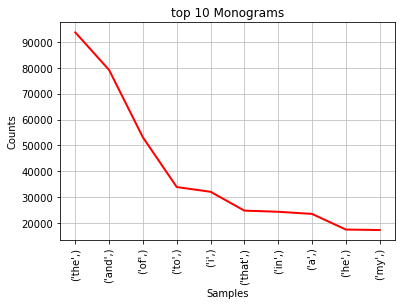

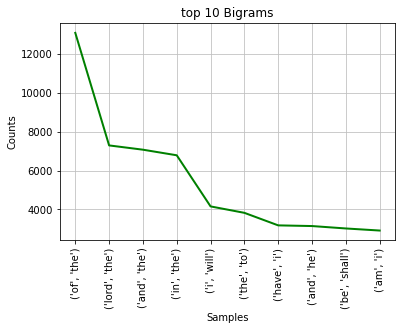

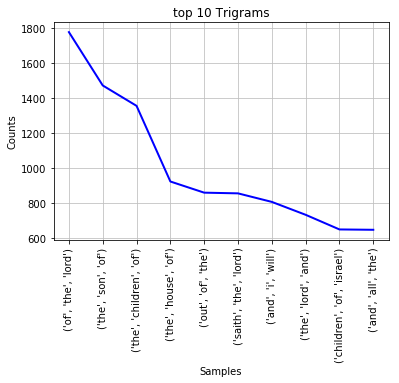

In [15]:
rawfile = open('C:\\Users\\Pavani\\Downloads\\big-data-python-class-master\\big-data-python-class-master\\Homeworks\\Homework5\\data\\bible+shakes.nopunc.txt')
rawdata = rawfile.read()
word = nltk.word_tokenize(rawdata)
monogram = nltk.ngrams(word,1)
bigrams = nltk.ngrams(word,2)
trigrams = nltk.ngrams(word,3)

monogram_count = nltk.FreqDist(monogram)
digram_count = nltk.FreqDist(bigrams)
trigram_count = nltk.FreqDist(trigrams)
plt.title("top 10 Monograms")
monogram_count.plot(10,cumulative=False,color='r')
plt.title("top 10 Bigrams")
bigram_count.plot(10,cumulative=False,color ='g')
plt.title("top 10 Trigrams")
trigram_count.plot(10,cumulative=False,color='b')

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



In [16]:
import re
from bs4 import BeautifulSoup
import urllib3
import operator

#gets data from the website and decode it into text
http = urllib3.PoolManager()
r = http.request('GET', 'http://www.gutenberg.org/ebooks/1661.txt.utf-8')
raw1=r.data.decode('utf8')

http = urllib3.PoolManager()
r = http.request('GET', 'http://www.gutenberg.org/files/244/244-0.txt')
raw2=r.data.decode('utf8')

http = urllib3.PoolManager()
r = http.request('GET', 'http://www.gutenberg.org/files/2852/2852-0.txt')
raw3=r.data.decode('utf8')

http = urllib3.PoolManager()
r = http.request('GET', 'http://www.gutenberg.org/files/108/108-0.txt')
raw4=r.data.decode('utf8')

http = urllib3.PoolManager()
r = http.request('GET', 'http://www.gutenberg.org/ebooks/2097.txt.utf-8')
raw5=r.data.decode('utf8')

#extracts all words from the text without punctuations 
word1=re.compile('\w+').findall(raw1)
word2=re.compile('\w+').findall(raw2)
word3=re.compile('\w+').findall(raw3)
word4=re.compile('\w+').findall(raw4)
word5=re.compile('\w+').findall(raw5)

d1=dict()
for word in word1:
    if word in d1:
        d1[word]+=1
    else:
        if len(word)>4:
            d1[word]=1

d2=dict()
for word in word2:
    if word in d2:
        d2[word]+=1
    else:
        if len(word)>4:
            d2[word]=1
            
d3=dict()
for word in word3:
    if word in d3:
        d3[word]+=1
    else:
        if len(word)>4:
            d3[word]=1
            
d4=dict()
for word in word4:
    if word in d4:
        d4[word]+=1
    else:
        if len(word)>4:
            d4[word]=1
            
d5=dict()
for word in word5:
    if word in d5:
        d5[word]+=1
    else:
        if len(word)>4:
            d5[word]=1

d=dict()
for word in word1:
    if word in d:
        d[word]+=1
    else:
        if len(word)>4:
            d[word]=1
for word in word2:
    if word in d:
        d[word]+=1
    else:
        if len(word)>4:
            d[word]=1
for word in word3:
    if word in d:
        d[word]+=1
    else:
        if len(word)>4:
            d[word]=1
for word in word4:
    if word in d:
        d[word]+=1
    else:
        if len(word)>4:
            d[word]=1
for word in word5:
    if word in d:
        d[word]+=1
    else:
        if len(word)>4:
            d[word]=1

word1_c=sum(d1.values())
word2_c=sum(d2.values())
word3_c=sum(d3.values())
word4_c=sum(d4.values())
word5_c=sum(d5.values())
#returns key with maximum value
def maxd(d):
    return max(d.iteritems(), key=operator.itemgetter(1))[0]

dw=dict()
for i in range(0,20):
    key=max(d.iteritems(), key=operator.itemgetter(1))[0]
    dw[key]=d[key]
    d[key]=0
for i in dw.keys():
    print "word:"+i
    print "Total Count:"+str(dw[i])
    dl=list()
    dl=[d1[i]/float(word1_c),d2[i]/float(word2_c),d3[i]/float(word3_c),d4[i]/float(word4_c),d5[i]/float(word5_c)]
    
    j=0
    ds=dict()
    db=['The Adventures of Sherlock Holmes','A Study in Scarlet','The Hound of the Baskervilles','The Return of Sherlock Holmes','The Sign of the Four']
    for i in range(0,5):
        ds[db[i]]=dl[i]
        j+=1
    print "Book Name:"+maxd(ds)
    print ""

word:Holmes
Total Count:1633
Book Name:The Return of Sherlock Holmes

word:Gutenberg
Total Count:418
Book Name:The Sign of the Four

word:little
Total Count:621
Book Name:The Adventures of Sherlock Holmes

word:There
Total Count:648
Book Name:A Study in Scarlet

word:would
Total Count:1158
Book Name:The Return of Sherlock Holmes

word:shall
Total Count:407
Book Name:The Adventures of Sherlock Holmes

word:house
Total Count:391
Book Name:The Return of Sherlock Holmes

word:could
Total Count:1042
Book Name:The Hound of the Baskervilles

word:there
Total Count:1231
Book Name:The Hound of the Baskervilles

word:about
Total Count:604
Book Name:The Sign of the Four

word:should
Total Count:704
Book Name:The Hound of the Baskervilles

word:Project
Total Count:418
Book Name:The Sign of the Four

word:Watson
Total Count:436
Book Name:The Hound of the Baskervilles

word:other
Total Count:561
Book Name:The Sign of the Four

word:which
Total Count:2473
Book Name:The Adventures of Sherlock Holmes

